# Análise exploratória avançada


## Objetivo

O objetivo desta análise é preparar adequadamente os conjuntos de dados para uma simulação de Monte Carlo, focando em uma compreensão aprofundada das variáveis envolvidas, suas distribuições, correlações e a identificação de outliers. Esta preparação envolve uma série de transformações e análises para assegurar que os dados estão prontos para simulações complexas que suportarão decisões estratégicas.

## Compreensão dos Dados

### Identificação de Variáveis e Estrutura dos Dados

Os dados são provenientes de diversas fontes, como Hubspot e Google Analytics, e incluem informações de eventos, dispositivos, sessões por idade, visualizações por cidade e país, entre outros. A estrutura dos dados foi explorada inicialmente através da função `compreender_dados`, que resumiu estatísticas descritivas básicas e identificou tipos de dados e a presença de valores nulos.

### Tratamento de Dados Ausentes

A análise revelou que alguns datasets possuíam colunas com alta porcentagem de dados nulos. Utilizamos estratégias específicas, como a remoção de colunas onde mais de 90% dos dados eram nulos e a limpeza subsequente de linhas com valores ausentes.

### Distribuição das Variáveis

Através de visualizações como histogramas e boxplots, examinamos a distribuição de variáveis chave, facilitando a identificação de padrões normais e atípicos dentro dos datasets.

## Correlações e Relações

### Cálculo de Correlações

A função `calcular_e_visualizar_correlacoes` foi empregada para explorar a força e direção das relações entre variáveis numéricas. As correlações foram visualizadas em mapas de calor, permitindo uma interpretação visual imediata das relações dinâmicas entre as variáveis.

### Análise de Relações Não Lineares

Investigamos possíveis relações não lineares utilizando gráficos de dispersão para observar padrões que não são facilmente capturados por coeficientes de correlação lineares.

## Análise Estatística Descritiva

### Utilização de Estatísticas Descritivas

Medidas de tendência central como média, mediana e moda, além de medidas de dispersão como desvio padrão e variância, foram calculadas para fornecer uma visão clara da natureza dos dados.

### Exploração de Forma da Distribuição

Medidas de assimetria e curtose foram utilizadas para entender melhor a forma das distribuições, ajudando a identificar distribuições que divergem da normalidade, o que é crucial para a modelagem posterior.

## Visualização de Dados

### Gráficos para Visualização

Empregamos técnicas de visualização avançadas, adaptando-as às necessidades específicas da análise. Isso incluiu o uso de plotagens interativas com Plotly para uma exploração mais dinâmica e detalhada.

## Identificação de Outliers

### Detecção e Avaliação de Outliers

Utilizamos métodos robustos como o EllipticEnvelope para identificar outliers em contextos multidimensionais. A análise de outliers ajudou a entender desvios significativos que poderiam afetar as simulações.

## Transformação de Dados

### Transformações Aplicadas

Transformações específicas, incluindo a remoção de duplicatas e valores baixos ou desconhecidos, foram realizadas para refinar os conjuntos de dados. Cada transformação foi justificada com base na natureza dos dados e no objetivo da análise.

## Preparação para a Simulação

### Organização dos Dados

A preparação final envolveu organizar os dados de forma a serem utilizados eficazmente na simulação de Monte Carlo, garantindo que todas as variáveis relevantes estivessem presentes e adequadamente tratadas.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import iqr
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.express as px

In [3]:
pd.set_option('display.float_format', '{:.1f}'.format)

## Dados provenientes do Hubspot

In [13]:
dados_gerais = pd.read_csv('/content/drive/Shareddrives/M10_SI/hubspot-crm-exports-all-contacts-2024-04-18.xlsx - All contacts.csv')

<ipython-input-13-781c98e7c80a>:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  dados_gerais = pd.read_csv('/content/drive/Shareddrives/M10_SI/hubspot-crm-exports-all-contacts-2024-04-18.xlsx - All contacts.csv')


## Dados provenientes do Looker Studio

In [7]:
acessos_eventos = pd.read_csv('/content/drive/Shareddrives/M10_SI/acessos_eventos_2023.csv')
acessos_dispositivos = pd.read_csv('/content/drive/Shareddrives/M10_SI/acessos_fontes_2023.csv')
acessos_geral = pd.read_csv('/content/drive/Shareddrives/M10_SI/acessos_geral_2023.csv')
age_sessions = pd.read_csv('/content/drive/Shareddrives/M10_SI/age_sessions_big_numbers_2023.csv')
country_city_views = pd.read_csv('/content/drive/Shareddrives/M10_SI/country_city_views_big_numbers_2023.csv')
ga_universal_csv = pd.read_csv('/content/drive/Shareddrives/M10_SI/ga_universal_2023.csv')
google_ads = pd.read_csv('/content/drive/Shareddrives/M10_SI/google_ads_2023.csv')
hour_users = pd.read_csv('/content/drive/Shareddrives/M10_SI/hour_users_big_numbers_2023.csv')
users_country = pd.read_csv('/content/drive/Shareddrives/M10_SI/users_country_big_numbers_geo_2023.csv')
week_users = pd.read_csv('/content/drive/Shareddrives/M10_SI/week_users_big_numbers_2023.csv')

## Compreensão dos dados

Este código detalha um procedimento de análise exploratória de dados que ajuda a entender profundamente as características e a qualidade dos conjuntos de dados. Utiliza-se uma função chamada `compreender_dados` para executar uma análise abrangente, aplicada a várias bases de dados. As operações e métricas específicas usadas são:

1. **Visualização Inicial**: Exibição das primeiras linhas do conjunto de dados para oferecer uma visão preliminar do formato e dos tipos de dados presentes.

2. **Análise Numérica Detalhada**:
   - **Estatísticas Descritivas Básicas**: Incluem média, desvio padrão, mínimo, máximo, e os quartis, que são extraídos através da função `describe()`.
   - **Mediana**: A medida de tendência central que divide os dados em duas metades iguais.
   - **Moda**: O valor que aparece com maior frequência nos dados, útil para identificar padrões ou valores comuns.
   - **Variância**: Mede a dispersão dos dados em relação à média, indicando quão espalhados estão os valores.
   - **Assimetria (Skewness)**: Uma medida que descreve o grau de distorção da distribuição simétrica dos dados, indicando se os dados estão inclinados para a esquerda ou direita.
   - **Curtose**: Indica o pico da distribuição dos dados, ajudando a entender a "tailedness" ou as caudas da distribuição em relação a uma distribuição normal.

3. **Tipos de Dados**: Categoriza cada coluna de acordo com seu tipo de dado (numérico, categórico, etc.), essencial para determinar o tipo de análises que podem ser realizadas.

4. **Dados Faltantes**: Calcula e exibe a porcentagem de valores ausentes em cada coluna, uma informação crucial para avaliar a integridade dos dados.

5. **Contagem de Zeros**: Enumera a quantidade de zeros em colunas numéricas, que podem indicar dados incompletos ou a necessidade de tratamento especial.

Aplicando esta função a diferentes datasets — como dados gerais, acessos a eventos, dispositivos, dados demográficos por idade, visualizações por cidade e país, e outros — o código oferece uma análise detalhada de cada conjunto. Isso inclui não apenas a identificação de padrões e lacunas, mas também prepara o terreno para intervenções de limpeza de dados ou análises mais profundas, ajustadas às necessidades de cada conjunto de dados.

Este método não apenas simplifica a compreensão dos dados brutos, mas também fornece uma base sólida para decisões informadas em etapas subsequentes de análise de dados ou desenvolvimento de modelos estatísticos e preditivos.

In [ ]:
def compreender_dados(dataframe):
    data_overview = {}
    data_overview['head'] = dataframe.head()
    numeric_df = dataframe.select_dtypes(include=[np.number])
    if not numeric_df.empty:
        desc_stats = numeric_df.describe()
        desc_stats.loc['median'] = numeric_df.median()
        mode_df = numeric_df.mode().iloc[0]
        desc_stats.loc['mode'] = mode_df
        desc_stats.loc['variance'] = numeric_df.var()
        desc_stats.loc['skew'] = numeric_df.skew()
        desc_stats.loc['kurtosis'] = numeric_df.kurt()
        data_overview['description'] = desc_stats
    data_overview['data_types'] = dataframe.dtypes.to_frame(name='Data Type')
    missing_values = dataframe.isnull().mean() * 100
    missing_values_df = missing_values.to_frame(name='Missing Values (%)')
    data_overview['missing_values'] = missing_values_df
    zero_counts = (numeric_df == 0).sum()
    zero_counts_df = zero_counts.to_frame(name='Zero Counts')
    data_overview['zero_counts'] = zero_counts_df
    return data_overview

#### Dados gerais

In [ ]:
dados_gerais

,Record ID,Average Pageviews,Became a Lead Date,Became a Marketing Qualified Lead Date,campanha,campanha_id,Contrato ID,Create Date,"Cumulative time in ""Lead (Pipeline da fase do ciclo de vida)"" (HH:mm:ss)","Date exited ""Lead (Pipeline da fase do ciclo de vida)""",...,media_id (Repositório),Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Numero Contrato,Record Source Detail 1,Time between contact creation and deal creation (HH:mm:ss),Time of First Session,Time of Last Session
0,13720467075,2,2024-04-18 16:03,2024-04-18 16:07,2AulasGratisIngles,300112,NaN,2024-04-18 16:03,00:03:57,2024-04-18 16:07,...,900001.0,3,2,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:02:08,2024-04-18 16:01,2024-04-18 16:01
1,13714444068,2,2024-04-18 15:34,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:34,00:02:38,2024-04-18 15:37,...,NaN,2,8,3,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:01:26,2024-04-18 15:11,2024-04-18 15:32
2,13710927026,1,2024-04-18 15:31,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:31,00:05:57,2024-04-18 15:37,...,NaN,2,2,2,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:05:09,2024-04-18 15:30,2024-04-18 15:30
3,13714799724,1,2024-04-18 15:29,2024-04-18 15:36,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:29,00:06:43,2024-04-18 15:36,...,NaN,2,1,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:05:34,2024-04-18 15:29,2024-04-18 15:29
4,13711655486,1,2024-04-18 15:20,2024-04-18 15:22,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:20,00:02:13,2024-04-18 15:22,...,NaN,2,1,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:01:00,2024-04-18 15:19,2024-04-18 15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52844,276151,2,2020-07-30 21:06,2023-05-25 20:52,Wizard_On,300004,NaN,2020-07-30 21:06,24695:45:53,2023-05-25 20:52,...,NaN,3,8,3,3,NaN,NaN,24695:43:47,2020-07-30 20:43,2023-05-25 20:48
52845,138438,2,2020-07-30 15:28,NaN,Wizard_On,300004,NaN,2020-07-30 15:28,12856:37:55,2022-01-17 08:06,...,NaN,4,10,4,4,6030/1,NaN,12856:37:54,2020-07-30 15:27,2023-07-29 23:03
52846,120651,2,2020-07-30 13:53,NaN,Nenhuma,300004,204916.0,2020-07-30 13:53,00:00:05,2020-07-30 13:53,...,NaN,17,33,16,9,17553/1,NaN,00:00:04,2020-07-30 13:48,2023-07-26 22:43
52847,99001,2,2020-07-30 13:15,NaN,Wizard_On,300004,NaN,2020-07-30 13:15,00:00:06,2020-07-30 13:15,...,NaN,15,38,17,13,NaN,NaN,00:00:06,2020-07-30 13:13,2022-12-07 17:41


In [ ]:
result1 = compreender_dados(dados_gerais)
print(result1['description'])

                     Record ID  Average Pageviews  campanha_id  Contrato ID  \
count                  52849.0            52849.0      52849.0       1418.0   
mean              1159284652.9                1.5     300016.6      13780.9   
std               1792983392.0                1.2         34.7      30554.4   
min                     7951.0                0.0     300004.0          2.0   
25%                660599651.0                1.0     300004.0       1936.0   
50%                758293501.0                1.0     300004.0       4336.5   
75%                850939736.0                2.0     300004.0      13031.2   
max              13725265190.0               31.0     300112.0     217770.0   
median             758293501.0                1.0     300004.0       4336.5   
mode                    7951.0                1.0     300004.0        340.0   
variance 3214789444068283392.0                1.4       1205.2  933573395.3   
skew                       4.5                3.4   

In [ ]:
print(result1['data_types'])

                                                   Data Type
Record ID                                              int64
Average Pageviews                                      int64
Became a Lead Date                                    object
Became a Marketing Qualified Lead Date                object
campanha                                              object
campanha_id                                            int64
Contrato ID                                          float64
Create Date                                           object
Cumulative time in "Lead (Pipeline da fase do c...    object
Date exited "Lead (Pipeline da fase do ciclo de...    object
DescricaoFeedback                                     object
Email Domain                                          object
Email hard bounce reason                              object
Facebook click id                                     object
First Conversion                                      object
First Conversion Date   

In [ ]:
print(result1['missing_values'])

                                                    Missing Values (%)
Record ID                                                          0.0
Average Pageviews                                                  0.0
Became a Lead Date                                                 0.5
Became a Marketing Qualified Lead Date                            10.0
campanha                                                           0.8
campanha_id                                                        0.0
Contrato ID                                                       97.3
Create Date                                                        0.0
Cumulative time in "Lead (Pipeline da fase do c...                 4.8
Date exited "Lead (Pipeline da fase do ciclo de...                 4.8
DescricaoFeedback                                                  5.7
Email Domain                                                       0.0
Email hard bounce reason                                          94.2
Facebo

#### Acessos eventos

In [ ]:
acessos_eventos

,Event name,Event count
0,carregamento_pagina,22538287
1,page_view,2299685
2,session_start,2012375
3,first_visit,1402714
4,user_engagement,412624
5,scroll,234792
6,interaction,161115
7,lead_enviado,74449
8,form_start,70077
9,play_video,65675


In [ ]:

result2 = compreender_dados(acessos_eventos)
print(result2['description'])

              Event count
count                21.0
mean            1403666.4
std             4889671.4
min                  11.0
25%                9227.0
50%               45046.0
75%              234792.0
max            22538287.0
median            45046.0
mode               8467.0
variance 23908886875803.4
skew                  4.4
kurtosis             20.1


In [ ]:
print(result2['data_types'])

            Data Type
Event name     object
Event count     int64


In [ ]:
print(result2['missing_values'])

             Missing Values (%)
Event name                  0.0
Event count                 0.0


#### Acessos dispositivos

In [ ]:
acessos_dispositivos

,Operating system,Event count
0,Android,24814051
1,iOS,3466762
2,Windows,990519
3,Linux,128601
4,Chrome OS,36199
5,Macintosh,35764
6,(not set),4747
7,Tizen,333
8,BlackBerry,9
9,Playstation 4,9


In [ ]:
result3 = compreender_dados(acessos_dispositivos)
print(result3['description'])

              Event count
count                10.0
mean            2947699.4
std             7759342.2
min                   9.0
25%                1436.5
50%               35981.5
75%              775039.5
max            24814051.0
median            35981.5
mode                  9.0
variance 60207391827840.1
skew                  3.1
kurtosis              9.5


In [ ]:
print(result3['data_types'])

                 Data Type
Operating system    object
Event count          int64


In [ ]:
print(result3['missing_values'])

                  Missing Values (%)
Operating system                 0.0
Event count                      0.0


#### Acessos gerais

In [ ]:
acessos_geral

,Hostname,Page path and screen class,Active users,Sessions,Conversions
0,promocoes.wizard.com.br,/wizard-on/,628757,1024172,8329
1,promocoes.wizard.com.br,/compromisso-de-aprendizado/,416303,482652,43308
2,promocoes.wizard.com.br,/curso-express/,306254,399427,4392
3,promocoes.wizard.com.br,/bolsa-de-estudo/,46683,51178,2554
4,promocoes.wizard.com.br,/curso-express/agradecimento,32591,35025,8024
5,promocoes.wizard.com.br,/wizard-on/agradecimento,26599,29461,37097
6,promocoes.wizard.com.br,/matricula-zero/,22720,24415,0
7,promocoes.wizard.com.br,/wizard-on-promo/,19052,23859,877
8,promocoes.wizard.com.br,/bolsa-de-estudo/agradecimento,15592,16523,27803
9,promocoes.wizard.com.br,/blue-friday/,4942,5421,0


In [ ]:
result4 = compreender_dados(acessos_geral)
print(result4['description'])

          Active users      Sessions  Conversions
count             45.0          45.0         45.0
mean           34198.3       46983.7       3309.1
std           118221.7      175054.8       9280.1
min                1.0           1.0          0.0
25%                3.0           5.0          0.0
50%              168.0         273.0          0.0
75%             4314.0        4501.0       1059.0
max           628757.0     1024172.0      43308.0
median           168.0         273.0          0.0
mode               1.0           1.0          0.0
variance 13976365325.0 30644169519.6   86119393.5
skew               4.1           4.7          3.5
kurtosis          17.0          23.5         11.6


In [ ]:
print(result4['data_types'])

                           Data Type
Hostname                      object
Page path and screen class    object
Active users                   int64
Sessions                       int64
Conversions                    int64


In [ ]:
print(result4['missing_values'])

                            Missing Values (%)
Hostname                                   0.0
Page path and screen class                 0.0
Active users                               0.0
Sessions                                   0.0
Conversions                                0.0


#### Sessões por idade

In [ ]:
age_sessions

,Age,Sessions
0,unknown,1509472
1,18-24,175969
2,25-34,134545
3,35-44,88545
4,45-54,55278
5,55-64,35077
6,65+,22822


In [ ]:
result5 = compreender_dados(age_sessions)
print(result5['description'])

               Sessions
count               7.0
mean           288815.4
std            541036.0
min             22822.0
25%             45177.5
50%             88545.0
75%            155257.0
max           1509472.0
median          88545.0
mode            22822.0
variance 292719969371.0
skew                2.6
kurtosis            6.8


In [ ]:
print(result5['data_types'])

         Data Type
Age         object
Sessions     int64


In [ ]:
print(result5['missing_values'])

          Missing Values (%)
Age                      0.0
Sessions                 0.0


#### Visualizações por cidade e país

In [ ]:
country_city_views

,Country,City,Views
0,Brazil,(not set),286492
1,Brazil,Sao Paulo,204149
2,Brazil,Rio de Janeiro,104473
3,Brazil,Belo Horizonte,48345
4,Brazil,Salvador,47408
...,...,...,...
2279,United Kingdom,Wembley,0
2280,United States,West Lafayette,0
2281,United States,Weymouth,0
2282,Japan,Yawatahama,0


In [ ]:
result6 = compreender_dados(country_city_views)
print(result6['description'])

              Views
count        2284.0
mean         1006.9
std          8076.7
min             0.0
25%             1.0
50%            23.5
75%           577.2
max        286492.0
median         23.5
mode            1.0
variance 65232297.5
skew           27.6
kurtosis      871.8


In [ ]:
print(result6['data_types'])

        Data Type
Country    object
City       object
Views       int64


In [ ]:
print(result6['missing_values'])

         Missing Values (%)
Country                 0.0
City                    0.0
Views                   0.0


#### Google analitics universal

In [ ]:
ga_universal_csv

,Page Title,Users,Sessions
0,Wizard On,85604,94025
1,Compromisso de Aprendizado | Wizard,30847,35638
2,Matricule-se e ganhe R$ 500 para viajar - Wizard,28300,31103
3,Curso Express - Wizard,28244,31003
4,▷ Curso de Inglês: [Conquiste Sua Fluência] em...,10822,10844
...,...,...,...
196,"Escola de Idiomas em Araucaria, Centro, PR - W...",11,0
197,Promoções – Wizard Nova Parnamirim,11,0
198,Teste de Inglês: Conclusão - Wizard Idiomas [u...,11,0
199,"Escola de Idiomas em Goiania, Setor Fazenda Ca...",11,0


In [ ]:
result7 = compreender_dados(ga_universal_csv)
print(result7['description'])

              Users   Sessions
count         201.0      201.0
mean         1206.9     1115.0
std          7131.3     7753.0
min            11.0        0.0
25%            11.0        0.0
50%            11.0        0.0
75%            22.0       11.0
max         85604.0    94025.0
median         11.0        0.0
mode           11.0        0.0
variance 50855330.3 60109166.6
skew            9.4        9.7
kurtosis      101.8      107.6


In [ ]:
print(result7['data_types'])

           Data Type
Page Title    object
Users          int64
Sessions       int64


In [ ]:
print(result7['missing_values'])

            Missing Values (%)
Page Title                 0.0
Users                      0.0
Sessions                   0.0


#### Google Ads

In [ ]:
google_ads

,Campaign,Campaign status,Interactions,Conversions,Clicks,Click conversion rate,Avg. CPC,Avg. CPV
0,[Wizard ON] Google | Search | Help me Buy | Cu...,Eligible,136185,17611.5,136185,0.1,7.5,0
1,[wizard on] youtube | tráfego | help me choose...,Eligible,0,0.0,0,0.0,0.0,0


In [ ]:
result8 = compreender_dados(google_ads)
print(result8['description'])

          Interactions  Conversions       Clicks  Click conversion rate  \
count              2.0          2.0          2.0                    2.0   
mean           68092.5       8805.7      68092.5                    0.1   
std            96297.3      12453.2      96297.3                    0.1   
min                0.0          0.0          0.0                    0.0   
25%            34046.2       4402.9      34046.2                    0.0   
50%            68092.5       8805.7      68092.5                    0.1   
75%           102138.8      13208.6     102138.8                    0.1   
max           136185.0      17611.5     136185.0                    0.1   
median         68092.5       8805.7      68092.5                    0.1   
mode               0.0          0.0          0.0                    0.0   
variance  9273177112.5  155082014.8 9273177112.5                    0.0   
skew               NaN          NaN          NaN                    NaN   
kurtosis           NaN   

In [ ]:
print(result8['data_types'])

                      Data Type
Campaign                 object
Campaign status          object
Interactions              int64
Conversions             float64
Clicks                    int64
Click conversion rate   float64
Avg. CPC                float64
Avg. CPV                  int64


In [ ]:
print(result8['missing_values'])

                       Missing Values (%)
Campaign                              0.0
Campaign status                       0.0
Interactions                          0.0
Conversions                           0.0
Clicks                                0.0
Click conversion rate                 0.0
Avg. CPC                              0.0
Avg. CPV                              0.0


#### Horário de uso

In [ ]:
hour_users

,Hour,Active users
0,20,143411
1,19,137369
2,21,134477
3,18,126677
4,22,122786
5,17,110903
6,15,105937
7,16,105622
8,14,104875
9,13,101974


In [ ]:
result9 = compreender_dados(hour_users)
print(result9['description'])

          Hour  Active users
count     24.0          24.0
mean      11.5       79830.2
std        7.1       42936.4
min        0.0        9616.0
25%        5.8       47705.8
50%       11.5       90496.5
75%       17.2      107178.5
max       23.0      143411.0
median    11.5       90496.5
mode       0.0        9616.0
variance  50.0  1843533581.1
skew       0.0          -0.3
kurtosis  -1.2          -1.2


In [ ]:
print(result9['data_types'])

             Data Type
Hour             int64
Active users     int64


In [ ]:
print(result9['missing_values'])

              Missing Values (%)
Hour                         0.0
Active users                 0.0


#### Usuários por país

In [ ]:
users_country

,Country,Active users
0,Brazil,1434957
1,United States,5879
2,Indonesia,2247
3,Hungary,968
4,Germany,909
...,...,...
120,Sri Lanka,1
121,São Tomé & Príncipe,1
122,Togo,1
123,Trinidad & Tobago,1


In [ ]:
result10 = compreender_dados(users_country)
print(result10['description'])

          Active users
count            125.0
mean           11615.1
std           128335.6
min                1.0
25%                2.0
50%                6.0
75%               46.0
max          1434957.0
median             6.0
mode               1.0
variance 16470015894.5
skew              11.2
kurtosis         125.0


In [ ]:
print(result10['data_types'])

             Data Type
Country         object
Active users     int64


In [ ]:
print(result10['missing_values'])

              Missing Values (%)
Country                      0.0
Active users                 0.0


#### Usuários por dia da semana

In [ ]:
week_users

,Day of week,Active users
0,3,254715
1,4,253531
2,5,253220
3,2,242692
4,7,235310
5,1,228985
6,6,227137


In [ ]:
result11 = compreender_dados(week_users)
print(result11['description'])

          Day of week  Active users
count             7.0           7.0
mean              4.0      242227.1
std               2.2       11942.2
min               1.0      227137.0
25%               2.5      232147.5
50%               4.0      242692.0
75%               5.5      253375.5
max               7.0      254715.0
median            4.0      242692.0
mode              1.0      227137.0
variance          4.7   142616064.5
skew              0.0          -0.2
kurtosis         -1.2          -2.2


In [ ]:
print(result11['data_types'])

             Data Type
Day of week      int64
Active users     int64


In [ ]:
print(result11['missing_values'])

              Missing Values (%)
Day of week                  0.0
Active users                 0.0


## Tratamento de dados nulos

Este código é parte de um script Python destinado ao tratamento de dados nulos em diversos conjuntos de dados. O processo inicia com a definição da função tratar_dados_nulos, que é aplicada a múltiplas bases de dados com o objetivo de limpar e preparar os dados para análises subsequentes. A função opera da seguinte maneira:

- **Identificação de Dados Ausentes:** Primeiramente, calcula-se a porcentagem de valores nulos em cada coluna dos dados fornecidos.

- **Remoção de Colunas com Alta Percentagem de Nulos:** Colunas com mais de 90% de valores ausentes são excluídas do conjunto de dados.

- **Limpeza de Linhas Nulas**: Após a remoção das colunas, qualquer linha que ainda contenha valores nulos é também descartada.

- **Tratamento de Zeros**: Zeros são tratados como valores nulos e, consequentemente, as linhas contendo zeros são removidas.

A função é então aplicada a diferentes datasets relacionados a acessos, eventos, dispositivos, sessões por idade, visualizações por cidade e país, dados do Google Analytics Universal, Google Ads, horário de uso e dados demográficos dos usuários. Cada aplicação da função resulta em um conjunto de dados limpo e pronto para análise, livre de grandes quantidades de dados nulos que poderiam distorcer os resultados de qualquer estudo estatístico ou modelagem preditiva.

In [ ]:
def tratar_dados_nulos(dados_gerais):
    missing_data = dados_gerais.isnull().mean() * 100
    columns_to_drop = missing_data[missing_data > 90].index
    data_cleaned = dados_gerais.drop(columns=columns_to_drop)
    data_cleaned = data_cleaned.replace(0, np.nan).dropna()
    return data_cleaned

#### Dados gerais

In [ ]:
dados_gerais = tratar_dados_nulos(dados_gerais)
dados_gerais

,Record ID,Average Pageviews,Became a Lead Date,Became a Marketing Qualified Lead Date,campanha,campanha_id,Create Date,"Cumulative time in ""Lead (Pipeline da fase do ciclo de vida)"" (HH:mm:ss)","Date exited ""Lead (Pipeline da fase do ciclo de vida)""",DescricaoFeedback,...,media_id,media_id (Repositório),Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Record Source Detail 1,Time between contact creation and deal creation (HH:mm:ss),Time of First Session,Time of Last Session
2469,5562432417,1.0,2024-03-22 14:00,2024-03-22 14:02,Campanha_WizardOn_Q1_2024,300112,2024-03-22 14:00,00:02:11,2024-03-22 14:02,Enviado para call center,...,16.0,900000.0,4,2.0,2,2,Modelo Padrão - Captação de Leads /Promoções ...,00:01:24,2024-03-22 14:00,2024-04-13 11:38
3611,1024526822,1.0,2024-03-15 19:26,2024-03-15 19:27,Campanha_WizardOn_Q1_2024,300112,2024-03-15 19:26,00:01:24,2024-03-15 19:27,Enviado para call center,...,900000.0,900000.0,4,2.0,2,2,Modelo Padrão - Captação de Leads /Promoções ...,00:00:41,2024-03-15 19:25,2024-03-27 12:38


#### Acessos eventos

In [ ]:
acessos_eventos = tratar_dados_nulos(acessos_eventos)
acessos_eventos

,Event name,Event count
0,carregamento_pagina,22538287
1,page_view,2299685
2,session_start,2012375
3,first_visit,1402714
4,user_engagement,412624
5,scroll,234792
6,interaction,161115
7,lead_enviado,74449
8,form_start,70077
9,play_video,65675


#### Acessos dispositivos

In [ ]:
acessos_dispositivos = tratar_dados_nulos(acessos_dispositivos)
acessos_dispositivos

,Operating system,Event count
0,Android,24814051
1,iOS,3466762
2,Windows,990519
3,Linux,128601
4,Chrome OS,36199
5,Macintosh,35764
6,(not set),4747
7,Tizen,333
8,BlackBerry,9
9,Playstation 4,9


#### Acessos gerais

In [ ]:
acessos_geral = tratar_dados_nulos(acessos_geral)
acessos_geral

,Hostname,Page path and screen class,Active users,Sessions,Conversions
0,promocoes.wizard.com.br,/wizard-on/,628757,1024172,8329.0
1,promocoes.wizard.com.br,/compromisso-de-aprendizado/,416303,482652,43308.0
2,promocoes.wizard.com.br,/curso-express/,306254,399427,4392.0
3,promocoes.wizard.com.br,/bolsa-de-estudo/,46683,51178,2554.0
4,promocoes.wizard.com.br,/curso-express/agradecimento,32591,35025,8024.0
5,promocoes.wizard.com.br,/wizard-on/agradecimento,26599,29461,37097.0
7,promocoes.wizard.com.br,/wizard-on-promo/,19052,23859,877.0
8,promocoes.wizard.com.br,/bolsa-de-estudo/agradecimento,15592,16523,27803.0
10,promocoes.wizard.com.br,/grupo-cavalheiro/,4831,5878,907.0
11,promocoes.wizard.com.br,/matricula-zero/agradecimento,4314,4501,9271.0


#### Sessões por idade

In [ ]:
age_sessions = tratar_dados_nulos(age_sessions)
age_sessions

,Age,Sessions
0,unknown,1509472
1,18-24,175969
2,25-34,134545
3,35-44,88545
4,45-54,55278
5,55-64,35077
6,65+,22822


#### Visualizações por cidade e país

In [ ]:
country_city_views = tratar_dados_nulos(country_city_views)
country_city_views

,Country,City,Views
0,Brazil,(not set),286492.0
1,Brazil,Sao Paulo,204149.0
2,Brazil,Rio de Janeiro,104473.0
3,Brazil,Belo Horizonte,48345.0
4,Brazil,Salvador,47408.0
...,...,...,...
2155,China,Wuhan,1.0
2156,United States,Yulee,1.0
2157,Montenegro,Zabljak Municipality,1.0
2158,Mexico,Zapopan,1.0


#### Google analitics universal

In [ ]:
ga_universal_csv = tratar_dados_nulos(ga_universal_csv)
ga_universal_csv

,Page Title,Users,Sessions
0,Wizard On,85604,94025.0
1,Compromisso de Aprendizado | Wizard,30847,35638.0
2,Matricule-se e ganhe R$ 500 para viajar - Wizard,28300,31103.0
3,Curso Express - Wizard,28244,31003.0
4,▷ Curso de Inglês: [Conquiste Sua Fluência] em...,10822,10844.0
...,...,...,...
58,Os meses do ano em inglês - Wizard Idiomas,11,11.0
59,Aprenda a usar os prefixos e sufixos em inglês...,11,11.0
60,Pronomes Pessoais em Inglês - Tudo o que você ...,11,11.0
61,"Escola de Idiomas em Porto Alegre, Jardim Lind...",11,11.0


#### Google Ads

In [ ]:
google_ads = tratar_dados_nulos(dados_gerais)

#### Horário de uso

In [ ]:
hour_users = tratar_dados_nulos(hour_users)
hour_users

,Hour,Active users
0,20.0,143411
1,19.0,137369
2,21.0,134477
3,18.0,126677
4,22.0,122786
5,17.0,110903
6,15.0,105937
7,16.0,105622
8,14.0,104875
9,13.0,101974


#### Usuários por país

In [ ]:
users_country = tratar_dados_nulos(users_country)
users_country

,Country,Active users
0,Brazil,1434957
1,United States,5879
2,Indonesia,2247
3,Hungary,968
4,Germany,909
...,...,...
120,Sri Lanka,1
121,São Tomé & Príncipe,1
122,Togo,1
123,Trinidad & Tobago,1


#### Usuários por dia da semana

In [ ]:
week_users = tratar_dados_nulos(week_users)
week_users

,Day of week,Active users
0,3,254715
1,4,253531
2,5,253220
3,2,242692
4,7,235310
5,1,228985
6,6,227137


## Correlações e relações

Este trecho de código é utilizado para explorar e visualizar as relações entre variáveis numéricas em conjuntos de dados. Através da função calcular_e_visualizar_correlacoes, o processo ocorre em várias etapas:

- **Seleção de Dados Numéricos**: A função filtra as colunas numéricas dos dados para análise.

- **Cálculo da Matriz de Correlação**: Calcula-se a correlação entre as variáveis selecionadas, gerando uma matriz que revela a intensidade e a direção das relações entre cada par de variáveis.

- **Visualização em Mapa de Calor:** A matriz é apresentada visualmente como um mapa de calor. Esta visualização é colorida em tons que variam do azul ao vermelho, onde cada cor indica a força da correlação. As correlações são também numericamente anotadas sobre o gráfico para uma leitura mais clara.

Esta abordagem é aplicada a vários conjuntos de dados, como acessos gerais, dados de Google Analytics Universal, horários de uso, e padrões de usuários por dia da semana. Cada aplicação fornece um gráfico claro e informativo, ajudando a identificar quais variáveis têm relações fortes ou fracas, e como elas interagem dentro dos dados.

In [8]:
def calcular_e_visualizar_correlacoes(data):
    correlation_matrix = data.select_dtypes(include=['number']).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação')
    plt.show()

#### Dados gerais

In [14]:
dados_gerais.drop(['Record ID', 'campanha_id', 'Contrato ID', 'media_id', 'media_id (Repositório)'], axis=1, inplace=True)

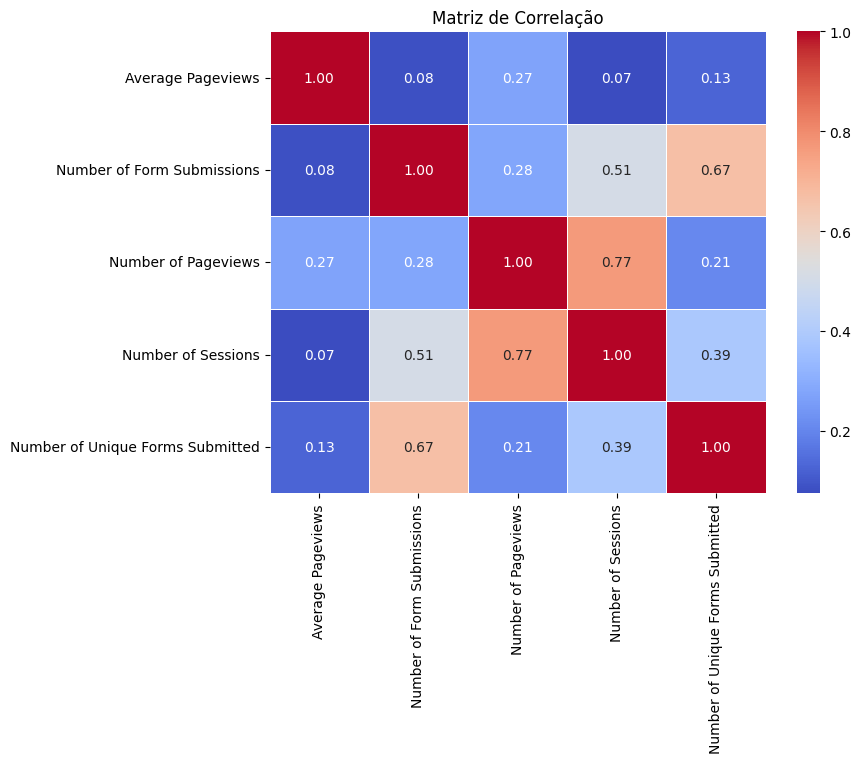

In [15]:
visualizacao = calcular_e_visualizar_correlacoes(dados_gerais)
visualizacao

#### Acessos gerais

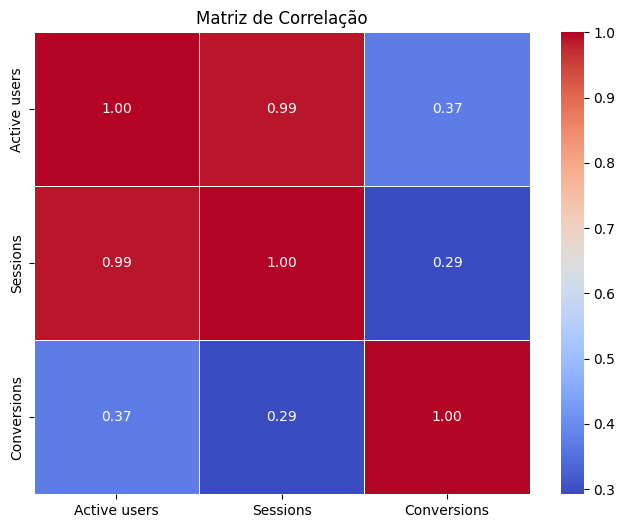

In [ ]:
visualizacao4 = calcular_e_visualizar_correlacoes(acessos_geral)
visualizacao4

#### Google analitics universal

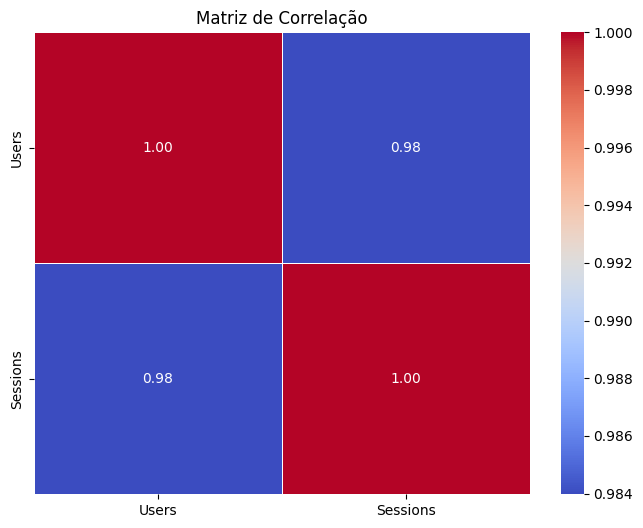

In [ ]:
visualizacao7 = calcular_e_visualizar_correlacoes(ga_universal_csv)
visualizacao7

#### Horário de uso

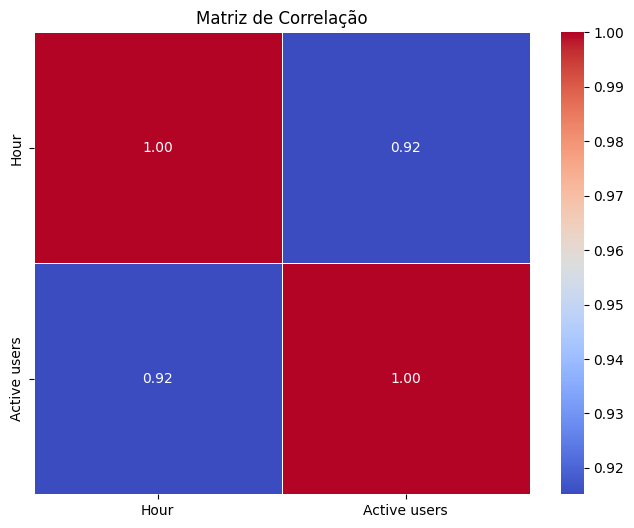

In [ ]:
visualizacao8 = calcular_e_visualizar_correlacoes(hour_users)
visualizacao8

#### Usuários por dia da semana

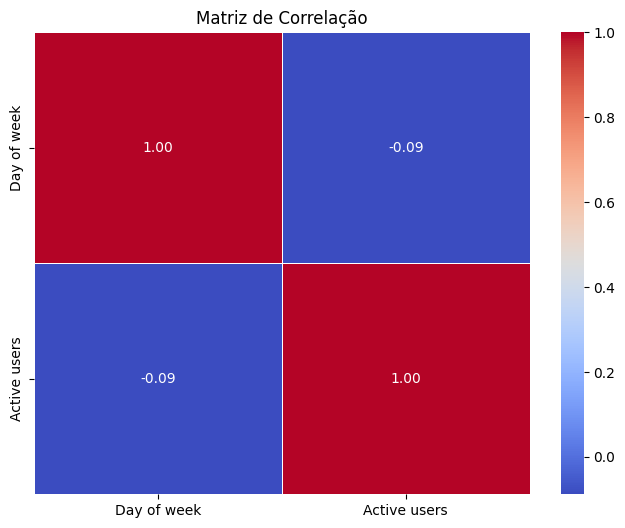

In [ ]:
visualizacao10 = calcular_e_visualizar_correlacoes(week_users)
visualizacao10

A análise de correlações e relações entre variáveis numéricas revelou-se um componente essencial na compreensão das interações dinâmicas dentro dos conjuntos de dados. A função calcular_e_visualizar_correlacoes facilitou este processo em várias etapas:

**Seleção de Dados Numéricos:**

Filtramos as colunas numéricas para garantir que apenas variáveis relevantes fossem incluídas na análise de correlação.

**Cálculo da Matriz de Correlação:**

Calculamos a matriz de correlação, que quantifica a força e a direção das relações entre pares de variáveis numéricas.

**Visualização em Mapa de Calor:**

Apresentamos a matriz de correlação como um mapa de calor, com uma escala de cores que varia do azul ao vermelho para indicar a força das correlações. As anotações numéricas sobre o gráfico facilitaram a interpretação visual imediata.
Esta metodologia foi aplicada a diversos conjuntos de dados, incluindo acessos gerais, dados de Google Analytics Universal, horários de uso e padrões de usuários por dia da semana. Cada aplicação resultou em gráficos claros e informativos que ajudaram a identificar relações fortes ou fracas entre as variáveis.

As principais conclusões são:

**Identificação de Correlações Significativas:**

Algumas variáveis mostraram correlações previsivelmente úteis, como a relação entre o número de formulários únicos submetidos e o número total de formulários submetidos.

**Insights para Melhorias Futuras:**

A análise das correlações forneceu uma base sólida para identificar variáveis que podem ser preditivas e relevantes para otimizações futuras na plataforma.
Ao utilizar esta abordagem de análise e visualização de correlações, obtivemos uma visão mais detalhada das interações entre variáveis, o que é crucial para a tomada de decisões informadas e para o planejamento de estratégias baseadas em dados.

# Visualização de dados

Esta sessão apresenta a visualização e explicação de utilização de alguns dados encaminhados pela Wizard.

 O gráfico de "Tendência de Leads ao longo do Tempo (2021-2024)", mostra a tendência de leads (potenciais clientes) ao longo do tempo, de 2021 a 2024. A intenção é conseguir analisar os seguintes fatores:

1. Identificar a tendência dos leads ao longo do tempo. Ou seja, em quais anos houve um aumento ou diminuição no número de leads.

2. Entender se existe padrão sazonal ou alguma anomalia (como um pico ou queda acentuada em um determinado ano).

3. Utilizar como uma linha de base para comparar os resultados das alterações do Teste A/B alterando de anual para mensal o fluxo na landing page.


Neste caso, o maior pico de envio de formulários até o momento foi em 2023.

In [ ]:
import plotly.express as px
import pandas as pd

dados_gerais['Create Date'] = pd.to_datetime(dados_gerais['Create Date'])
dados_filtrados = dados_gerais[dados_gerais['Create Date'].dt.year.isin([2021, 2022, 2023, 2024])]
leads_anuais = dados_filtrados.groupby(dados_filtrados['Create Date'].dt.year)['Number of Unique Forms Submitted'].sum()

fig1 = px.line(x=leads_anuais.index, y=leads_anuais.values, title='Tendência de Leads ao longo do Tempo (2021-2024)')
fig1.update_xaxes(title_text='Ano')
fig1.update_yaxes(title_text='Número de Leads')
fig1.show()


O gráfico de "Atividade por Hora do Dia" e "Atividade por Dia da Semana", mostra a atividade dos usuários em diferentes horas do dia e semanas. A intenção é conseguir analisar os seguintes fatores :


1. Identificar quando os usuários estão mais ativos e, portanto, quando pode ser o melhor momento para implementar certas estratégias de marketing ou conversão.

3. Com base na atividade do usuário ao longo do dia, pode personalizar a experiência do usuário. Por exemplo, mostrar diferentes versões da landing page em diferentes momentos do dia.


Neste caso, os usuários tem maior pico de atividade nas Terças, Quartas e Quintas, por volta das 20h da noite.

In [ ]:
fig9 = px.scatter(hour_users, x='Hour', y='Active users', title='Atividade por Hora do Dia')
fig9.show()

fig11 = px.bar(week_users, x='Day of week', y='Active users', title='Atividade por Dia da Semana')
fig11.show()


In [ ]:
fig9 = px.scatter(hour_users, x='Hour', y='Active users', title='Atividade por Hora do Dia')
fig9.show()

fig11 = px.bar(week_users, x='Day of week', y='Active users', title='Atividade por Dia da Semana')
fig11.show()


O gráfico “Distribuição de Sistemas Operacionais (Android, iOS, Windows e Linux)”, mostra o número de eventos associados a cada sistema operacional. A utilidade se da por :

1. Entender a distribuição do  público em termos de sistemas operacionais que eles usam.
2. Com base na distribuição dos sistemas operacionais, direcionar recursos e esforços para otimizar a experiência do usuário para a maioria dos seus usuários.


Neste caso, o sistema operacional com mais eventos/atividades realizados pelos usuários é o Android.

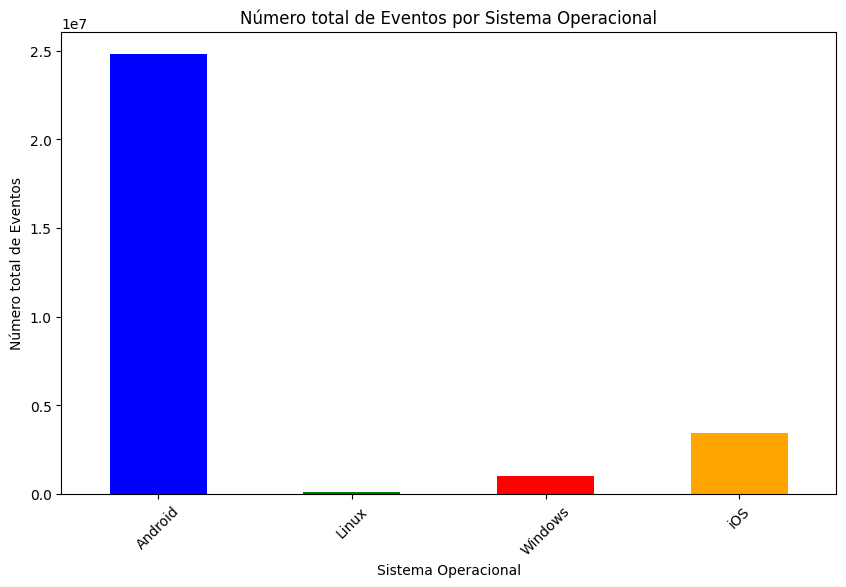

In [ ]:
sistemas_operacionais_desejados = ['Android', 'Windows', 'iOS', 'Linux']
filtered_data = acessos_dispositivos[acessos_dispositivos['Operating system'].isin(sistemas_operacionais_desejados)]
grouped_data = filtered_data.groupby('Operating system')['Event count'].sum().reset_index()

fig12 = px.bar(grouped_data, x='Operating system', y='Event count', title='Número total de Eventos por Sistema Operacional')
fig12.show()


## Arima - Previsão de dados

*Atividade Extra*

ARIMA, que é a sigla para AutoRegressive Integrated Moving Average , é um método de previsão para séries temporais. As séries temporais são sequências de pontos de dados, medidos tipicamente em sucessivos pontos no tempo espaçados em intervalos uniformes.

O modelo ARIMA é baseado na ideia de que as informações nos valores passados da série temporal podem ser usadas para prever os valores futuros. Ele usa uma combinação linear de seus valores passados e uma série de erros para fazer previsões.

No contexto do  projeto, o modelo ARIMA foi usado para prever o número de envios únicos de formulários em 2025. Com base nos valores passados dessa série temporal, o modelo ARIMA identifica tendência e padrões e preve os valores futuros.


(1) ARIMA Model – Complete Guide to Time Series Forecasting in Python. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

modelo_arima = ARIMA(leads_anuais, order=(1, 1, 1))
resultado = modelo_arima.fit()

index_2025 = np.arange(len(leads_anuais), len(leads_anuais) + 12)
previsao_2025 = resultado.predict(start=index_2025[0], end=index_2025[-1], dynamic=False)

previsao_2025_media = previsao_2025.mean()
print("Previsão média para o ano de 2025:", previsao_2025_media)


Previsão média para o ano de 2025: 26255.654504816004


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodel

# Identificação de outliers

A análise de outliers é crucial para identificar destaques nos dados. Identificar e entender esses valores ajuda a evitar vieses ou inconsistências em possíveis análises e entender esses eventos atípicos.

O código apresentado oferece uma abordagem sistemática e detalhada para identificar outliers em conjuntos de dados variados, utilizando o método EllipticEnvelope da biblioteca scikit-learn, bem como um método mais tradicional baseado em quartis. Aqui está uma explicação aprofundada das funções e da metodologia aplicada:

### **Função para Calcular Outliers com EllipticEnvelope**
O método EllipticEnvelope é particularmente útil para detectar outliers em um contexto multidimensional. A função calcular_outliers segue estes passos:

**Configuração do Modelo:** O EllipticEnvelope é configurado com uma contamination de 0.1, indicando que se espera que aproximadamente 10% dos pontos sejam outliers.

**Seleção de Dados:** Seleciona-se apenas as colunas alvo para análise.

**Treinamento do Modelo:** O modelo é treinado com os dados selecionados.

**Predição de Outliers:** Utiliza-se o modelo para prever se cada ponto é um outlier (-1 indica um outlier).

### **Função para Identificar Outliers com Quartis**
A função identificar_outliers utiliza a técnica de quartis para identificar valores atípicos. A abordagem é baseada na distância interquartil (IQR):

**Cálculo do IQR:** Para cada coluna numérica, calcula-se o IQR como a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1).
Definição de Limites: Os limites para detectar outliers são definidos como Q1 - 1.5 * IQR (limite inferior) e Q3 + 1.5 * IQR (limite superior).

**Contagem de Outliers:** Conta-se o número de valores que caem fora desses limites para cada coluna.

### **Aplicação e Análise de Resultados**

O código aplica essas funções a diferentes conjuntos de dados para identificar outliers em vários contextos, como usuários ativos por hora, por dia, sessões por idade, eventos em dispositivos e visualizações por cidade e país. A análise dos outliers fornece insights sobre comportamentos atípicos que podem indicar oportunidades para otimizar recursos ou ajustar estratégias de marketing e operação.

Por exemplo, a identificação de horários com baixa atividade (como entre 3 e 5 da manhã) pode sugerir a possibilidade de economizar recursos durante esses períodos. Da mesma forma, a detecção de uma alta atividade na plataforma Android sugere que focar nessa plataforma pode maximizar o retorno sobre o investimento em desenvolvimento e marketing.

### **Visualização e Análise Adicional**
A função visualizar_distribuicoes_e_outliers é usada para plotar distribuições e boxplots, ajudando visualmente a identificar padrões e outliers nas variáveis selecionadas.

Ao aplicar essas técnicas, o código não apenas identifica os outliers, mas também oferece a base para decisões estratégicas e operacionais mais informadas. Esta abordagem é essencial para entender profundamente as dinâmicas dos dados e como eles podem afetar diferentes aspectos de uma organização ou estudo.


### Função para calcular outliers

Para calcular os outliers estamos utilizando o método EllipticEnvelope da biblioteca scikit-learn. Este método calcula a matriz de covariância dos dados para determinar uma elipse, com base nos pontos fornecidos. Os pontos que caem fora desta elipse são considerados outliers.

In [ ]:
def calcular_outliers(df, colunas_alvo):
    fracao = 1
    conjunto = EllipticEnvelope(contamination=0.1, support_fraction=fracao)
    dados_selecionados = df[colunas_alvo]
    conjunto.fit(dados_selecionados)
    outliers = conjunto.predict(dados_selecionados) == -1
    outliers_selecionados = df.loc[outliers]
    return outliers_selecionados


Para utilizar a função os seguintes parametros devem ser fornecidos



1.   df, referente ao dataframe trabalhado
2.   colunas_alvo, referente a colunas dos valores do outliers a serem calculados



In [ ]:
def identificar_outliers(data):
    outliers = {}
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            irq = q3 - q1
            lower_bound = q1 - 1.5 * irq
            upper_bound = q3 + 1.5 * irq
            count_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
            outliers[column] = count_outliers
    print("Outliers identificados por variável:", outliers)

def visualizar_distribuicoes_e_outliers(data_cleaned):
    variaveis = ['Number of Pageviews', 'Number of Sessions', 'Average Pageviews']
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    for i, var in enumerate(variaveis):
        sns.histplot(data_cleaned[var], bins=30, ax=axes[0, i], kde=True)
        axes[0, i].set_title(f'Distribution of {var}')
        sns.boxplot(data_cleaned[var], ax=axes[1, i])
        axes[1, i].set_title(f'Boxplot of {var}')
    plt.tight_layout()
    plt.show()

### Outliers de acesso (temporal)

In [ ]:
hour_users

calculo outliers hora de acesso:

In [ ]:
outliers = calcular_outliers(hour_users, ['Active users'])
print(outliers)

Ao analisarmos os outliers de horas de acesso, podemos ver que todos se tratam de outliers com baixo numero de úsuarios ativos. Sendo esse o horario de 3 as 5 da manhã. Isso pode indicar uma possivel oportunidade de poupar recursos computacionais nesses horarios de menor demanda.

In [ ]:
week_users

calculo outliers dias de acesso:

In [ ]:
outliers = calcular_outliers(week_users, ['Active users'])
print(outliers)

Ao analisarmos os outliers de dias de acesso, a única indicação foi referente a sexta-feira, que possui uma baixo número de acessos em relação aos outros dias. Não foi possível tirar nenhum resultado conclusivo dessa informação, uma vez que existem poucos dados quanto a esse tópico.

### Outliers idade

In [ ]:
age_sessions

Primeiramente vamos remover o unknow dos dados, para não prejudicar a analise

In [ ]:
age_sessions_outliers = age_sessions[age_sessions['Age'] != 'unknown']

In [ ]:
outliers = calcular_outliers(age_sessions_outliers, ['Sessions'])
print(outliers)

Ao analisar o resultado, podemos notar que os outliers no caso de idade, e o publico de 18 a 24 anos. Pondendo assim focar as canpanhas para esse público, uma vez que são os que mais acessam o site.

### Outliers plataforma de acesso

In [ ]:
acessos_dispositivos

In [ ]:
outliers = calcular_outliers(acessos_dispositivos, ['Event count'])
print(outliers)

Ao analisarmos os outliers referentes a plataforma de acesso podemos notar uma grande predominância da plataforma Android. Podendo ser um indicativo que o site deve ser produzido visando excelência nesta plataforma, uma vez que é de onde vem a maioria dos acessos.

### Outliers de campanhas

In [ ]:
country_city_views

In [ ]:
outliers = calcular_outliers(country_city_views, ['Views'])
print(outliers)

### Outliers Cidade de acesso

In [ ]:
country_city_views

removendo cidades (not set), e cidades sem ou com quase nenhum usuario para um melhor resultado de outliers

In [ ]:
country_city_views_outliers = country_city_views[country_city_views['City'] != '(not set)']
country_city_views_outliers = country_city_views_outliers[country_city_views_outliers['Views'] >= 100]

In [ ]:
outliers = calcular_outliers(country_city_views_outliers, ['Views'])
print(outliers)

Ao obter os outliers das cidades com mais visualizações e possivel obter uma lista das cidades com maior busca pela Wizzard ON, assim sendo possivel indentificar possiveis cidades para abrir novas unidades de a acordo com a demanda apresentada. Abaixo e possivel ver a lista com as 106 cidades indentificadas como outliers em relação a visualizações da pagina:

In [ ]:
outliers

### Outliers campanha

In [ ]:
ga_universal_csv

In [ ]:
ga_universal_csv_outliers = ga_universal_csv[ga_universal_csv['Users'] >= 100]

removendo campanhas com menos de 100 usuarios, uma vez que sé tratam de campanhas muito localizadas.

country_city_views_outliers = country_city_views_outliers[country_city_views_outliers['Views'] >= 100]

In [ ]:
ga_universal_csv_outliers = calcular_outliers(ga_universal_csv_outliers, ['Users','Sessions'])
print(outliers)

Ao analisar o resultado, é possível visualizar tanto as campanhas outliers em questão de sucesso como a Matricule-se e ganhe R$500 para viajar, para que possam ser reproduzidas. Como campanhas com resultados não tão bons, como curso de Inglês para Adultos - Aulas Flexíveis, que não tiveram tanto retorno assim, para enterder o motivo disso. Mas vale mencionar que é necessário analisar a divulgação dessas campanhas para ver se tiveram o mesmo potencial de alcance.



## Transformação de dados

O processo de transformação de dados é uma etapa crucial no preparo de conjuntos de dados para análises futuras ou para o desenvolvimento de modelos estatísticos. Este procedimento envolve uma série de técnicas destinadas a melhorar a qualidade e a padronização dos dados, garantindo que as informações estejam em um estado ótimo para processamento. Embora os dados já cheguem em bom estado, pequenos ajustes são necessários para aprimorar sua consistência e usabilidade.

### Principais Etapas de Transformação:

1. **Remoção de Dados Faltantes**: Esta transformação é essencial para evitar distorções nas análises causadas por dados incompletos. Ao eliminar registros que contêm valores nulos ou campos vazios, garantimos uma base mais sólida para a realização de estudos estatísticos e preditivos.

2. **Remoção de Valores Desconhecidos**: Dados rotulados como 'desconhecido' ou 'não definido' são frequentemente excluídos para prevenir a introdução de ruídos nas análises. Isso assegura que todos os dados utilizados sejam significativos e claramente definidos, contribuindo para a precisão dos resultados obtidos.

3. **Tratamento de Dados Nulos ou Quase Nulos (Valores Absurdos)**: Dados com valores extremamente baixos ou incoerentes são removidos para evitar resultados enviesados. Especialmente em contextos onde tais valores podem indicar erros de coleta ou processamento, sua remoção é fundamental para manter a integridade analítica.

4. **Remoção de Valores Duplicados**: Eliminar duplicatas é importante para evitar a contagem ou análise múltipla dos mesmos dados. Isso ajuda a manter a precisão das análises estatísticas e garante que as decisões baseadas em dados sejam feitas com a maior precisão possível.

Cada uma dessas etapas de transformação é aplicada sistematicamente através de uma pipeline de tratamento de dados. Esta abordagem não só padroniza o tratamento de diferentes tabelas, mas também facilita a automação e a replicabilidade do processo de limpeza de dados, tornando o trabalho com grandes volumes de informações mais eficiente e confiável.

observação: vale mencionar que não foi utilizada a remoção de outliers devido ao fato de grande parte dos conjuntos possuírem poucas colunas, o que impossibilitaria análises mais elaboradas.







### Remoção de dados faltantes

Para o tratamento dos dados e importante remover os dados faltantes, de forma a evitar que intefiram no reusltado em ánalises futuras.

definição:

In [ ]:
def remover_faltantes(df):
  df_tratado = df.dropna().replace('', pd.NA).dropna()
  return df_tratado

teste:

In [ ]:
dados_teste = {
    'id': [1, 2, 3, 4, 5],
    'valor': ['a', '', 'c', 'd', None],
}
df_teste = pd.DataFrame(dados_teste)

resultado_tratamento = remover_faltantes(df_teste)

resultado_tratamento

Para esse teste, esperasse a remoção das linhas com id 2 e 5.

### Remoção de valores desconhecidos

Para evitar que os dados sejam poluídos com informações sem label ou de origem desconhecida, será realizada a remoção dos valores com label desconhecida nos dados.

definição:

In [ ]:
def remover_desconhecido(df):
    return df[
        ~df.apply(lambda row: row.astype(str).str.contains('unknown|(not set)', case=False).any(), axis=1)
    ]

teste:

In [ ]:
dados_teste = {
    'label': ['unknown', 2, 3, 4, '(not set)'],
    'valor': [11, 21, 23, 34, 55],
}
df_teste = pd.DataFrame(dados_teste)

resultado_tratamento = remover_desconhecido(df_teste)

resultado_tratamento

Para esse teste, esperasse a remoção das linhas com label 1 e 5.

### Remoção de dados nulos ou quase nulos (valores absurdos)

Para o tratamento dos dados, será realizada a remoção de dados nulos, com valores muito baixos. Isso se deve ao fato de muitas campanhas ou acessos(cidade) tratarem de projetos muito locais, ou com 0 acessos. O que pode enviesar o resultado final.


definição:

In [ ]:
def remover_valores_baixos(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    df_copy = df.copy()

    for col in numeric_cols:
        if (df_copy[col] > 50).any():
            df_copy = df_copy[df_copy[col] >= 50]

    return df_copy

teste:

In [ ]:
dados_teste = {
    'label': [1, 2, 3, 4, 5],
    'valor': [11, 21, 23, 34, 55],
}
df_teste = pd.DataFrame(dados_teste)

resultado_tratamento = remover_valores_baixos(df_teste)

resultado_tratamento

Para esse teste, esperasse que apenas a coluna com label 'e' seja mantida

### Remoção de valores duplicados

Para o tratamento de dados, será realizada a identificação e remoção de registros duplicados para evitar contagens ou análises enviesadas.


definição:

In [ ]:
def remover_duplicados(df):
    return df.drop_duplicates()

teste:

In [ ]:
dados_teste = {
    'label': ['a', "a", "b", "c", 'd'],
    'valor': [11, 11, 23, 23, 99],
}
df_teste = pd.DataFrame(dados_teste)

resultado_tratamento = remover_duplicados(df_teste)

resultado_tratamento

Para esse teste, esperasse que uma das colunas de label 'a' seja removida.

### Pipeline

Abaixo se encontra a pipeline reunindo todos os tratamentos de dados criados. De forma a padronizar e facilitar o tratamento das tabelas.

In [ ]:
def aplicar_pipeline(df):
  df_tratado = remover_faltantes(df)
  df_tratado = remover_desconhecido(df_tratado)
  df_tratado = remover_valores_baixos(df_tratado)
  df_tratado = remover_duplicados(df_tratado)
  return df_tratado

## Preparação para a simulação

Para preparação dos dados, será feita a seleção e o tramento das tabelas atravez de pipeline.

Os critérios utilizados para seleção das tabelas que podem ser utilizadas para simulação foram ter pelo menos 10 linhas, para ter dados suficientes para análise. Vale mencionar que também será utilizado o mesmo critério utilizado para o cálculo do outliers, uma vez que os dados da tabela precisam ser comparáveis para uma possível análise.

- acessos_geral -> df_acessos_geral
- country_city_views -> df_cidade_acessos
- ga_universal_csv -> df_ga_universal
- hour_users -> df_horario_acesso
- users_country -> df_pais_acesso

realizando a preparação dos dados:

In [ ]:
df_acessos_geral = aplicar_pipeline(acessos_geral)
df_cidade_acessos = aplicar_pipeline(country_city_views)
df_ga_universal = aplicar_pipeline(ga_universal_csv)
df_horario_acesso = aplicar_pipeline(hour_users)
df_pais_acesso = aplicar_pipeline(users_country)

visualizando dados preparados:

In [ ]:
df_acessos_geral

In [ ]:
df_cidade_acessos

In [ ]:
df_ga_universal

In [ ]:
df_horario_acesso

In [ ]:
df_pais_acesso

Assim, estando todas as tabelas possíveis de serem utilizadas em um modelo tratadas, e organizadas para um possível uso.

# Conclusão

A análise exploratória de dados realizada para a plataforma Wizard On proporcionou uma visão detalhada e abrangente das diversas facetas do comportamento do usuário e do desempenho da plataforma ao longo do tempo. Através de métodos estatísticos e de visualização de dados, foram identificados padrões, correlações e anomalias que são cruciais para a tomada de decisões informadas e estratégicas.

#### Principais Achados

1. **Tendência de Leads ao Longo do Tempo (2021-2024)**:
   - A análise revelou que o maior pico de envio de formulários ocorreu em 2023, destacando um aumento significativo no interesse durante esse ano. Esse padrão pode ser utilizado como uma linha de base para comparar futuras campanhas e estratégias de captação de leads.
   - Identificou-se a necessidade de explorar padrões sazonais e anomalias para ajustar as estratégias de marketing e maximizar o impacto ao longo do tempo.

2. **Atividade por Hora do Dia e Dia da Semana**:
   - Observou-se que os usuários são mais ativos nas terças, quartas e quintas, por volta das 20h. Esse insight é fundamental para otimizar as campanhas de marketing e atividades promocionais, ajustando os horários de envio de e-mails e anúncios para coincidir com os períodos de maior atividade do usuário.
   - A personalização da experiência do usuário com base na hora do dia pode aumentar significativamente o engajamento e a conversão, mostrando diferentes versões da landing page em diferentes momentos do dia.

3. **Distribuição de Sistemas Operacionais**:
   - A predominância do Android como o sistema operacional mais utilizado pelos usuários indica a necessidade de otimizar a experiência do usuário especificamente para dispositivos Android. Esse direcionamento pode melhorar a satisfação do usuário e aumentar as taxas de conversão.
   - A análise dos sistemas operacionais também ajuda a identificar áreas de melhoria para outros sistemas, garantindo uma experiência de usuário consistente e de alta qualidade em todas as plataformas.

4. **Previsão de Dados com ARIMA**:
   - O uso do modelo ARIMA para prever o número de envios únicos de formulários em 2025 forneceu uma previsão média que pode ser utilizada para planejar estratégias futuras. Esta previsão é baseada em tendências passadas e ajuda a estabelecer metas realistas e alcançáveis.
   - A aplicação de modelos preditivos como o ARIMA oferece uma vantagem estratégica ao permitir que a Wizard On se antecipe a mudanças e adapte suas estratégias com base em previsões de dados robustas.

#### Relevância das Correlações e Relações

1. **Cálculo e Visualização de Correlações**:
   - A identificação de correlações significativas, como a forte relação entre o número de formulários únicos submetidos e o número total de formulários submetidos, proporciona insights valiosos para a otimização das estratégias de coleta de dados e conversão de leads.
   - A visualização em mapas de calor facilitou a interpretação das correlações e ajudou a destacar as variáveis que têm maior impacto no desempenho da plataforma.

#### Recomendação para Etapas Futuras

1. **Implementação de Testes A/B**:
   - Realizar testes A/B para validar as hipóteses levantadas durante a análise exploratória. Isso inclui testar diferentes versões da landing page e horários de envio de campanhas para maximizar a conversão e o engajamento do usuário.
2. **Monitoramento Contínuo e Ajustes**:
   - Implementar um sistema de monitoramento contínuo para avaliar a eficácia das mudanças implementadas. Realizar ajustes conforme necessário para garantir que as estratégias permanecem alinhadas com os objetivos de negócio.
3. **Otimização Multicanal**:
   - Expandir a análise para incluir mais variáveis e fontes de dados, como redes sociais e e-mails, para obter uma visão mais completa e integrada do comportamento do usuário.
4. **Personalização e Segmentação**:
   - Utilizar os insights sobre a atividade do usuário para personalizar a experiência da plataforma, segmentando os usuários com base em seus comportamentos e preferências.

### Conclusão Geral

A análise exploratória avançada realizada estabeleceu uma base sólida para a tomada de decisões estratégicas e a otimização da plataforma Wizard On. A compreensão profunda dos dados, aliada às visualizações interativas e às previsões preditivas, permite que a Wizard On se posicione proativamente no mercado educacional online, atendendo de forma eficaz às necessidades dos usuários e alcançando os objetivos de negócio. Com essas informações, a Wizard On pode continuar a evoluir e melhorar, proporcionando uma experiência de aprendizado online superior e impulsionando seu sucesso no mercado.